In [1]:
import tensorflow as tf
from IPython.core.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow .keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,TensorBoard,ModelCheckpoint
from sklearn.metrics import classification_report , confusion_matrix
import ipywidgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings


2022-10-28 14:59:09.973582: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-28 14:59:11.000221: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-28 14:59:11.000343: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-28 14:59:11.204681: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-28 14:59:15.611298: W tensorflow/stream_executor/platform/de

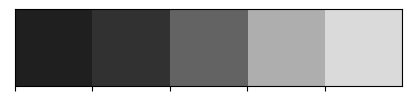

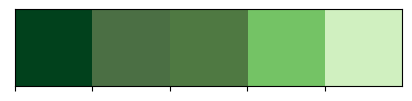

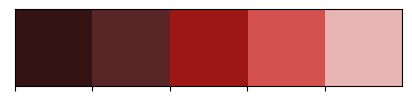

In [2]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

In [3]:
labels = ['glioma','notumor','meningioma','pituitary']

In [4]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('/home/mo/projects/Brain Tumor Classification model/data','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/home/mo/projects/Brain Tumor Classification model/data', 'Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

FileNotFoundError: [Errno 2] No such file or directory: '/home/mo/Brain Tumor Classification model/data/Training/glioma'

In [12]:
X_train , y_train = shuffle(X_train , y_train , random_state = 101)

In [13]:
X_train.shape

(7023, 150, 150, 3)

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X_train , y_train , test_size = 0.1 , random_state = 101)

In [15]:
y_train

array(['notumor', 'meningioma', 'pituitary', ..., 'pituitary', 'glioma',
       'glioma'], dtype='<U10')

In [16]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)


In [17]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

2022-10-27 14:32:20.249734: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mo/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-10-27 14:32:20.251410: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-27 14:32:20.252632: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mo-HP-EliteBook-850-G3): /proc/driver/nvidia/version does not exist
2022-10-27 14:32:20.256473: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate = 0.5)(model)
model = tf.keras.layers.Dense(4 , activation = 'softmax')(model)
model = tf.keras.models.Model(inputs = effnet.input , outputs = model)

In [19]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'Adam' , metrics = ['accuracy'])

In [20]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [21]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

2022-10-27 14:32:33.451693: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 383940000 exceeds 10% of free system memory.


Epoch 1/12


2022-10-27 14:32:43.873436: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 69120000 exceeds 10% of free system memory.
2022-10-27 14:32:43.916348: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 69120000 exceeds 10% of free system memory.
2022-10-27 14:32:44.005113: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 69120000 exceeds 10% of free system memory.
2022-10-27 14:32:44.067611: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 72855552 exceeds 10% of free system memory.


178/178 [==============================] - ETA: 0s - loss: 0.2743 - accuracy: 0.9008
Epoch 1: val_accuracy improved from -inf to 0.88924, saving model to effnet.h5


TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

pred = model.predict(X_test)

In [ ]:
pred = model.predict(X_test)

In [ ]:
round(pred[:10])

In [ ]:
y_test[:10]